In [1]:
from RCN import RCN

import matplotlib.pyplot as plt
import numpy as np
from readouts import *
from copy import copy
import jax.numpy as jnp
from jax import random, grad, jit
from functools import partial

from dysts.datasets import load_dataset
from utils import train_test_split, compute_forecast_horizon, calculate_lyapunov_exponent

In [38]:
file_path = 'data/EEG_train.npy'

data = np.load(file_path)
print(data.shape)

test_path = 'data/EEG_test.npy'
test_data = np.load(test_path)

(9640, 64)


In [47]:
index = 1
x_train = data[:,:]
x_test = data[:,:]

In [224]:
exp_key = random.PRNGKey(42)

dt = 1.

exp_key, key = random.split(exp_key, 2)

readout = LinearReadout(448, 1e-6, use_tanh=False)
#readout = QuadraticReadout(500, reg_param=1e-6)
# readout = LinearReadoutWithDerivatives(alpha=0)
rcn = RCN(key=key, n_dim=448, readout=readout, n_input=64, dt=dt, washout_steps=1000,
          spectral_radius=0.75, sigma=.1, gamma=1, linear_step=False)





In [225]:
rcn.W_in.shape

(64, 448)

train MSE is 0.0015527638125125184


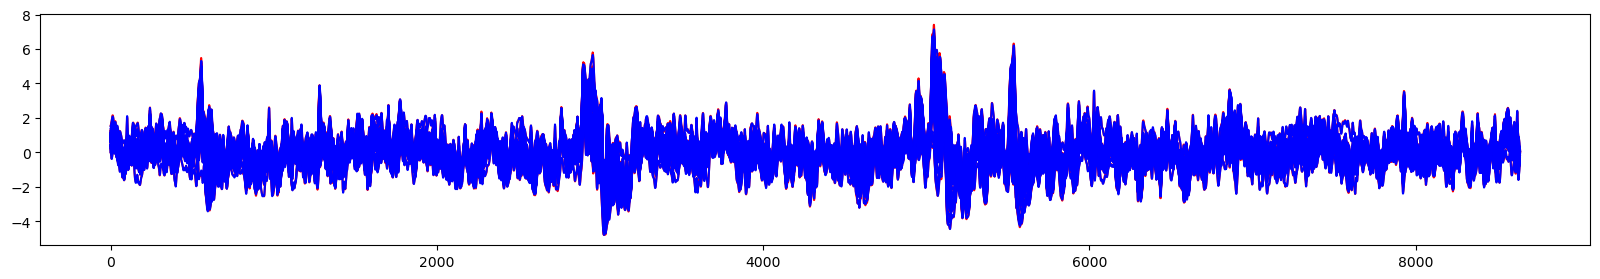

In [226]:
rcn.train(x_train)
plt.figure(figsize=(20,3))
y = rcn.predict_states()
plt.plot(x_train[1000:], 'r')
plt.plot(y, 'b')



print(f"train MSE is {rcn.train_MSE()}")

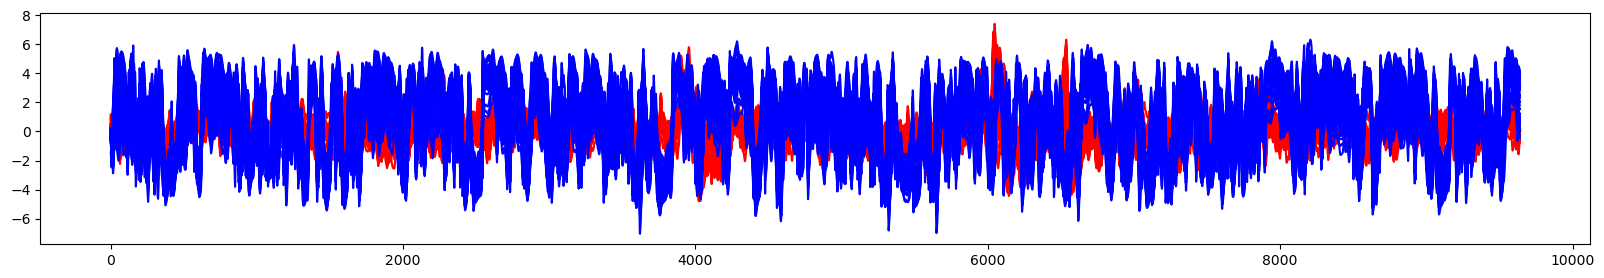

In [227]:
L = len(x_test)
y_test = rcn.generate(L)
plt.figure(figsize=(20,3))
plt.plot(x_test[:,:], 'r')
plt.plot(y_test[:,:], 'b')

plt.savefig("test_all.png")

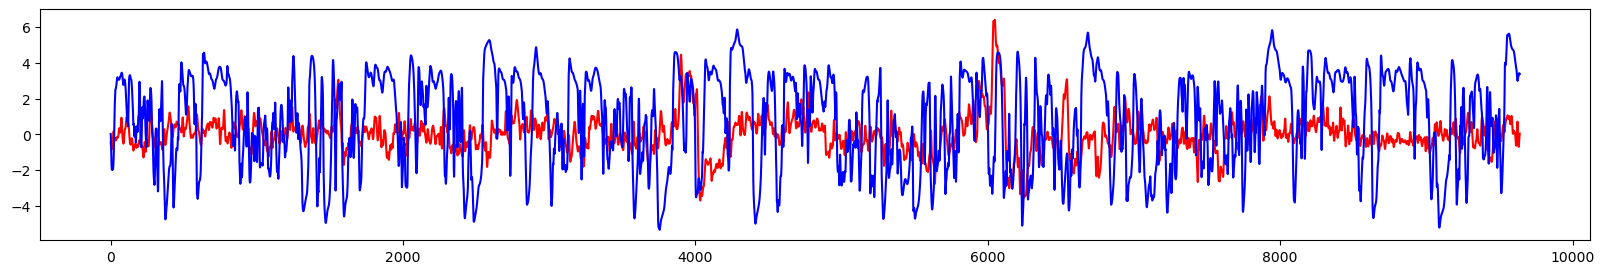

In [228]:
L = len(x_test)
y_test = rcn.generate(L)
plt.figure(figsize=(20,3))
plt.plot(x_test[:,0], 'r')
plt.plot(y_test[:,0], 'b')

plt.savefig("test.png")

/home/pietro/anaconda3/envs/diff_res/lib/python3.10/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


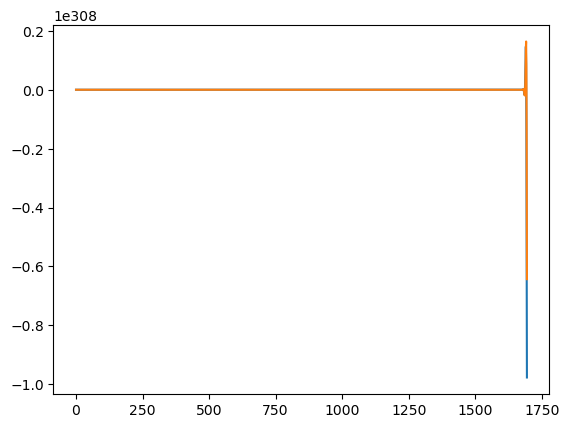

In [7]:
states = rcn.R[:,:2]
plt.plot(states)

In [8]:
states.shape

(9640, 2)